## Inteligência Artificial 2025.1 : Atividade N1 - 2o Bimestre 

### Nome:

### RA:

Um engenheiro de computação foi contratado para trabalhar com **deep learning** em uma startup. Como em todos os segmentos de mercado que utilizam essa tecnologia, os dados analisados são confidenciais e não podem ser expostos ou vazados. Diante disso, o engenheiro trabalhará com a base de dados **"Base_N1_B2_2025.1.xlsx"**, sem o conhecimento do tipo de negócio que os dados foram extraídos. 

A partir dos dados fornecidos, o engenheiro de computação deve desenvolver:

**(5,0 pontos) um classificador utilizando Redes Neurais Artificiais que retorne a classe "Red" ou "Blue" para uma entrada [Feature1, Feature2];**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
base = pd.read_excel('Base_N1_B2_2025.1.xlsx')

base.head(10)

,Feature1,Feature2,Label
0,0.000000,0.000000,Blue
1,0.000125,0.002497,Blue
2,0.000499,0.004975,Blue
3,0.001121,0.007416,Blue
4,0.001987,0.009801,Blue
5,0.003093,0.012111,Blue
6,0.004433,0.014330,Blue
7,0.006001,0.016439,Blue
8,0.007788,0.018421,Blue
9,0.009787,0.020260,Blue


In [3]:
# Transformando o 'Label'
map_colors = {'Blue': 1, 'Red': 0}
base['Label'] = base['Label'].apply(lambda x: map_colors[x])

In [4]:
def plot_chart(dataset):
    blue_labels = dataset[dataset['Label'] == 1]
    red_labels = dataset[dataset['Label'] == 0]

    # Plot Feature 1 vs Feature 2
    plt.figure(figsize=(10, 6))
    # Plot Feature 1 as blue and Feature 2 as red
    plt.scatter(blue_labels['Feature1'], blue_labels['Feature2'], color='blue', label='Blue', alpha=0.5)
    plt.scatter(red_labels['Feature1'], red_labels['Feature2'], color='red', label='Red', alpha=0.5)
    plt.legend()

    plt.title('Feature 1 vs Feature 2')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.grid()
    #plt.savefig('feature1_vs_feature2.png')
    plt.show()

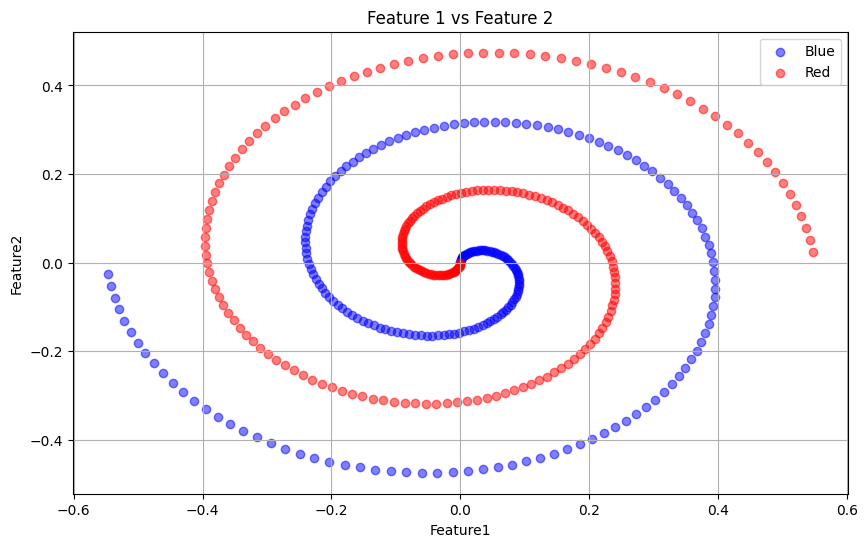

In [5]:
plot_chart(base)

In [6]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  440 non-null    float64
 1   Feature2  440 non-null    float64
 2   Label     440 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 10.4 KB


In [ ]:
base['Label'].value_counts() / len(base)

Label
1    0.5
0    0.5
Name: count, dtype: float64

In [8]:
stats = base.describe().round(3).T
stats

,count,mean,std,min,25%,50%,75%,max
Feature1,440.0,0.0,0.225,-0.547,-0.137,0.0,0.137,0.547
Feature2,440.0,-0.0,0.223,-0.474,-0.147,0.0,0.147,0.474
Label,440.0,0.5,0.501,0.000,0.000,0.5,1.000,1.000


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2025-04-27 12:47:46.980291: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-27 12:47:46.981026: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 12:47:46.984990: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-27 12:47:46.992535: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745768867.003949   87375 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745768867.00

In [10]:
# Separar features e labels
X = base[['Feature1', 'Feature2']].values
y = base['Label'].values

In [11]:
# Dividir em treino e teste
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Criar validação
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X_train_raw, y_train, test_size=0.5, random_state=42
)

# Treino = 70%
# Validação = 15%
# Teste = 15%

In [12]:
pd.concat([pd.DataFrame(X_train_raw, columns=['Feature1', 'Feature2']), pd.Series(y_train, name='Label')], axis=1)

,Feature1,Feature2,Label
0,-0.040834,0.304777,1
1,-0.179575,-0.455909,1
2,0.052484,0.023488,1
3,-0.062544,0.116810,0
4,-0.071972,-0.008736,0
...,...,...,...
149,0.013948,-0.151861,1
150,-0.228549,-0.025795,1
151,-0.546932,-0.024943,1
152,0.529706,0.104938,0


In [13]:
def feature_engineering(X_data):
    # Criação de novas features
    X_data = pd.DataFrame(X_data, columns=['Feature1', 'Feature2'])
    X_data['quadrado_Feature1'] = X_data['Feature1'] ** 2
    X_data['quadrado_Feature2'] = X_data['Feature2'] ** 2
    # Normalização
    X_data = (X_data - np.mean(X_data, axis=0)) / np.std(X_data, axis=0)
    return X_data

In [14]:
X_train = feature_engineering(X_train_raw)
X_val = feature_engineering(X_val_raw)
X_test = feature_engineering(X_test_raw)

In [15]:
# Load pre-trained model
from tensorflow.keras.models import load_model
model = load_model('model.keras')

E0000 00:00:1745768869.079720   87375 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745768869.111427   87375 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/lucas/wsl-projects/isa-atividade-redes-neurais/venv/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [42]:
# Construir a Rede Neural
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')  # saída binária
])

/home/lucas/wsl-projects/isa-atividade-redes-neurais/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1745768804.912406   86796 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1745768805.014840   86796 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [128]:
# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.03),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [129]:
# Add early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)


In [130]:
# Treinar o modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/1000


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.4696 - loss: 0.6881 - val_accuracy: 0.4870 - val_loss: 0.6685
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5247 - loss: 0.6550 - val_accuracy: 0.4805 - val_loss: 0.6628
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6014 - loss: 0.6245 - val_accuracy: 0.4805 - val_loss: 0.6545
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6214 - loss: 0.6061 - val_accuracy: 0.4870 - val_loss: 0.6303
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6921 - loss: 0.5622 - val_accuracy: 0.4935 - val_loss: 0.6218
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7186 - loss: 0.5455 - val_accuracy: 0.5325 - val_loss: 0.6188
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6912 - loss: 0.5411 - val_accuracy: 0.6429 - val_loss: 0.5815
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7906 - loss: 0.4821 - val_accuracy: 0.6429 - val_loss: 0.56

In [16]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Acurácia no teste: {accuracy:.2%}")

Acurácia no teste: 88.64%


(14835, 4)
464/464 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


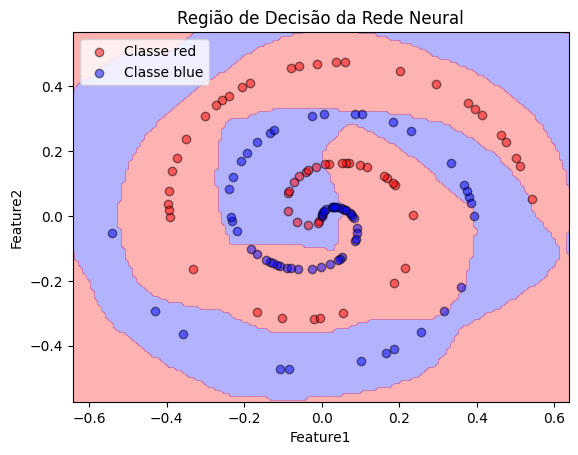

In [37]:
# Plot decision boundary
def plot_decision_boundary(model, X, y, title='Região de Decisão da Rede Neural'):
    margin = 0.1
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    features = np.c_[xx.ravel(), yy.ravel(), 
                     np.square(xx.ravel()), np.square(yy.ravel())]
    features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)
    features = features.reshape(-1, 4)
    print(features.shape)
    Z = model.predict(features)
    Z = (Z > 0.5).astype(int)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.3)
    for classe, cor in zip([0, 1], ['red', 'blue']):
        plt.scatter(X[y == classe, 0], X[y == classe, 1], color=cor, label=f'Classe {cor}', alpha=0.5, edgecolors='k')
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.title(title)
    plt.legend()
    plt.show()
plot_decision_boundary(model, X_test_raw, y_test)

**(2,0 pontos) o diagrama da rede neural desenvolvida no item anterior e indicar a quantidade de parâmetros dessa rede;**

In [ ]:
#usar este espaco para desenvolver sua resposta

**(2,0 pontos) um parágrafo explicando a precisão da rede neural desenvolvida e os pontos de atenção que devem ser observados na utilização desta rede com novos dados;**

In [ ]:
#usar este espaco para desenvolver sua resposta

**(1,0 ponto) uma API para classificação de novos dados sem utilizar qualquer biblioteca ou método ("prediction") obtido no treinamento da rede neural.**

In [ ]:
#usar este espaco para desenvolver sua resposta

#### Lembre-se: na dúvida, você é o engenheiro do projeto!